In [ ]:
!pip install scanpy

In [ ]:

import pandas as pd
import numpy as np
import scanpy as sc



df = pd.read_csv("/content/DEG_allresultsRVS.csv")

# Seting 'geneid' as the index and droping the other gene identifier columns
df.set_index('geneid', inplace=True)
df.drop(['external_gene_name', 'entrezgene_id'], axis=1, inplace=True)

# Identifying the columns containing l2fc data
l2fc_columns = [col for col in df.columns if col.startswith('l2fc')]

df_norm = df[l2fc_columns].replace([np.inf, -np.inf], np.nan)
df_norm = np.log1p(df_norm / df_norm.sum(axis=0) * 1e4)
df_norm = df_norm.fillna(df_norm.mean(axis=0))

conditions = df[l2fc_columns].columns.str.extract(r'l2fc\.(\w+)')[0]


conditions_df = pd.DataFrame(index=df_norm.index)
for condition in conditions.unique():
    conditions_df.loc[df_norm[f"l2fc.{condition}"].index, 'condition'] = condition

# Convert to Scanpy AnnData
adata = sc.AnnData(
    df_norm.values,
    obs=conditions_df,
    var=pd.DataFrame(index=df_norm.columns)
)
adata.var['gene_symbols'] = adata.var_names


In [114]:
df.columns

Index(['pvalue.pef', 'pvalue.ref', 'pvalue.pef.ref', 'padj.pef', 'padj.ref',
       'padj.pef.ref', 'l2fc.pef', 'l2fc.ref', 'l2fc.pef.ref',
       'control_median', 'hfpef_median', 'hfref_median', 'z.pos.pef',
       'z.pos.ref', 'description'],
      dtype='object')

In [87]:

# Label encoding
le = LabelEncoder()
adata.obs['condition_encoded'] = le.fit_transform(adata.obs['condition'])

In [105]:
# show adata
adata

AnnData object with n_obs × n_vars = 13326 × 3
    obs: 'condition', 'condition_encoded'
    var: 'gene_symbols'

In [ ]:
sc.pp.neighbors(adata)

In [108]:
sc.tl.umap(adata)

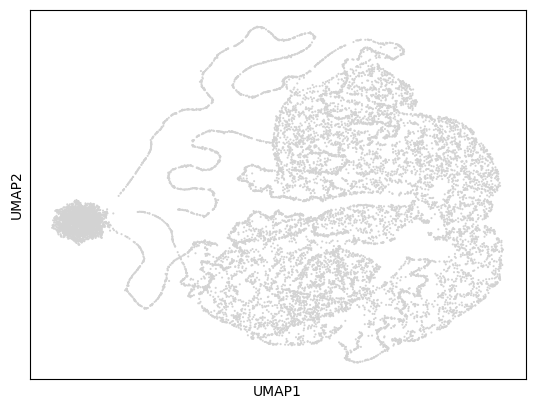

In [109]:
sc.pl.umap(adata)

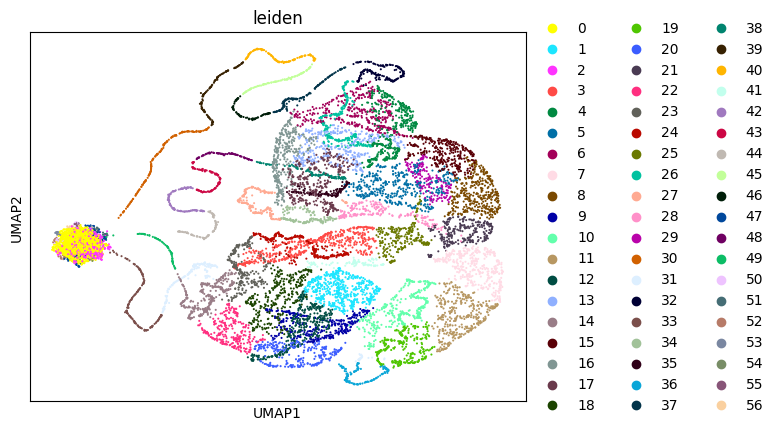

In [111]:
sc.pl.umap(adata, color='leiden')  # Colors UMAP plot by Leiden clusters


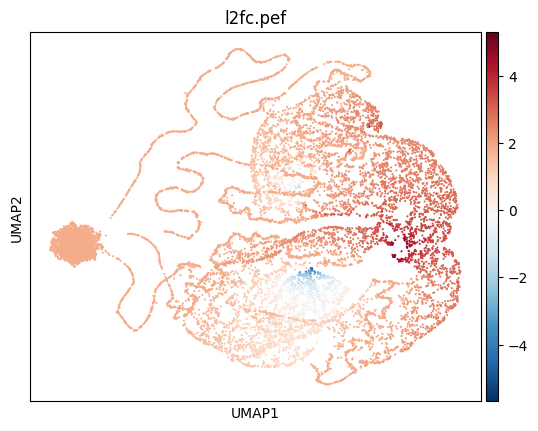

In [116]:
sc.pl.umap(adata, color='l2fc.pef', cmap='RdBu_r')  # Red/blue for up/downregulation


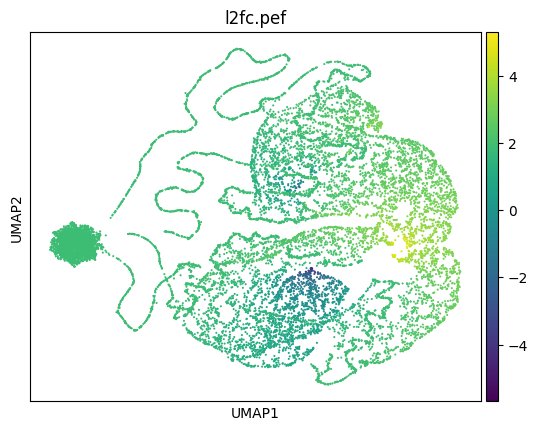

In [119]:

sc.pl.umap(adata, color='l2fc.pef')


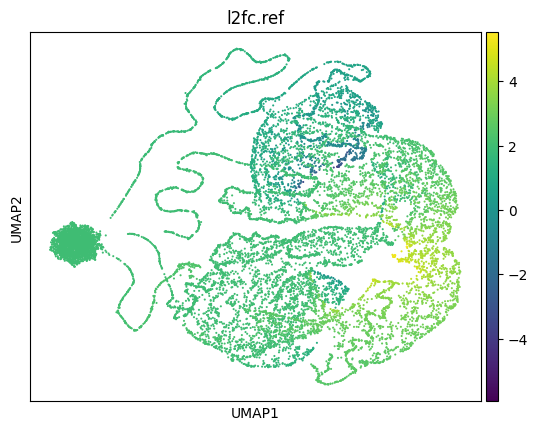

In [120]:

sc.pl.umap(adata, color='l2fc.ref')
